<a href="https://colab.research.google.com/github/tohnperfect/data_viz_2022/blob/main/DataViz03_Data_Distribution_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA  (https://wendynavarrete.com/principal-component-analysis-with-numpy/)

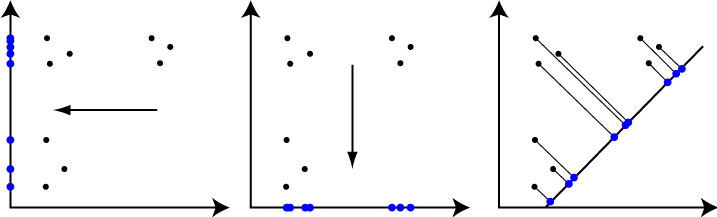

เมื่อมี ตัวแปร ที่จะนำมาแสดงการกระจายของข้อมูลมากกว่า 2 ตัวแปร สามารถใช้ PCA (Principle Component Analysis) เพื่อลดจำนวนตัวแปรลงมาได้โดยรักษาลักษณะการกระจายของข้อมูลได้มากที่สุด

### load data

In [2]:
import pandas as pd

In [3]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ดูการกระจายของข้อมูลในตารางๆแบบ คร่าวๆ

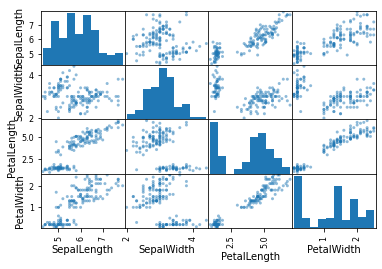

In [5]:
pd.plotting.scatter_matrix(example_df);

### เริ่มทำ PCA

sklearn -> scikit-learn เป็น package ที่รวบรวม function การทำ Data Science - Machine Learning - Data Mining เอาไว้ให้เราใช้แบบไม่ต้องเขียนเอง

import

In [6]:
from sklearn.decomposition import PCA

define

In [7]:
pca = PCA()

fit-transform

In [8]:
thisdata = example_df.iloc[:,:-1]
thisdata

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
new_axis = pca.fit_transform(thisdata)

In [11]:
new_axis.shape

(150, 4)

In [12]:
new_axis

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

In [13]:
PCAdf = pd.DataFrame(new_axis, columns = ['PCA1','PCA2','PCA3','PCA4'])
PCAdf

,PCA1,PCA2,PCA3,PCA4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129
...,...,...,...,...
145,1.944017,0.187415,0.179303,0.425082
146,1.525664,-0.375021,-0.120636,0.255723
147,1.764046,0.078519,0.130784,0.136295
148,1.901629,0.115877,0.722874,0.040873


In [14]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

### plot PCA data

In [15]:
from matplotlib import pyplot as plt

In [18]:
example_df2 = example_df.replace({'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'})

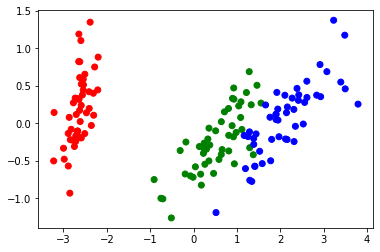

In [19]:
plt.scatter(PCAdf['PCA1'],PCAdf['PCA2'],c=example_df2['Name'])

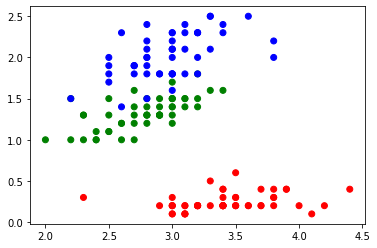

In [20]:
plt.scatter(example_df2['SepalWidth'],example_df2['PetalWidth'],c=example_df2['Name'])